## Final Project Submission

Please fill out:

- Student name:
- Student pace: self paced / part time / full time
- Scheduled project review date/time:
- Instructor name:
- Blog post URL:


# Data understanding


In [1]:
# Importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error
import folium
from datetime import datetime

## Loading the Dataset


In [2]:
kc_data= pd.read_csv('data/kc_house_data.csv')
kc_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#getting basic information about the data
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

The dataset has 21 columns:

- 6 categorical and 15 numerical columns.
- It has as a total of 21597 rows, the columns with a non null count of less than 21597 show existence of some missing values


In [4]:
#getting general summary statistics  on the data
kc_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Data Pre-processing


Involves manipulation, dropping or cleaning of data before it is used in order to ensure or enhance performance.


### Identifying and dealing with missing values


In [5]:
def missing_values(data):
    """A simple function to identify data has missing values"""
    # identify the total missing values per column
    # sort in order 
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)

    # store in a dataframe 
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})

    # remove values that are missing 
    missing.drop(missing[missing["Percentage(%)"] == 0].index, inplace = True)

    return missing


missing_data = missing_values(kc_data)
missing_data

,Missing Values,Percentage(%)
yr_renovated,3842,0.177895
waterfront,2376,0.110015
view,63,0.002917


- The threshold on how to deal with missing values commonly used is 50% and also depends on the specific column. The percentages of missing values are very low for the specific columns so we can replace.
- The percentage of the missing values for waterfront column(11.00%), view column(0.29%) and year renovated column(17.70%) are less than 50% , so we can replace them.
- Checking the year renovated column we may assume the missing value is because the house was never renovated, maybe the house did not have a view or a waterfront also for the other two columns hence we can Fill them with zeros.
- Since the missing values in the 3 columns are categorical and are a small percentage of the columns, replacing them with mode won`t skew the data nor give false conclusions


In [9]:
def filling_missing_values(data, columns):
    missing = missing_values(data) # store the output of missing_values function
    for col in columns:
        if col in missing.index: # check if column has missing values
            data[col] = data[col].fillna(data[col].mode()[0]) # fill missing values with mode
    return data
filling_missing_values(kc_data, ['waterfront','yr_renovated','view'])

kc_data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Duplicates


In [10]:
def check_duplicates(data):
    """
    A simple function to check for duplicates in a given dataset.
    """
    duplicates = data.duplicated().sum()
    return duplicates
check_duplicates(kc_data)

0

There are no duplicates in the data.


### Data inconsistencies


In [11]:
def print_value_counts(df):
    for column in df.columns:
        # Print the column name
        print("Value counts for {} column:".format(column))
        # Print the value counts for the column
        print(df[column].value_counts())
        # Add a separator for clarity
        print("="*30)

print_value_counts(kc_data)

Value counts for id column:
795000620     3
8910500150    2
7409700215    2
1995200200    2
9211500620    2
             ..
3649100387    1
2767603649    1
1446403617    1
5602000275    1
1523300157    1
Name: id, Length: 21420, dtype: int64
Value counts for date column:
6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
            ... 
11/2/2014      1
1/31/2015      1
5/24/2015      1
5/17/2014      1
7/27/2014      1
Name: date, Length: 372, dtype: int64
Value counts for price column:
450000.0    172
350000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
278800.0      1
439888.0      1
354901.0      1
942000.0      1
402101.0      1
Name: price, Length: 3622, dtype: int64
Value counts for bedrooms column:
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
Value counts for bathrooms column:
2.50    5377
1.00    3851


In [12]:
def find_inconsistent_data(df):
    # Identify potential data inconsistencies
    inconsistent_bedrooms = df[(df['bedrooms'] == 10) | (df['bedrooms'] == 11) | (df['bedrooms'] == 33)]
    inconsistent_bathrooms = df[(df['bathrooms'] == 7) | (df['bathrooms'] == 8)]

    # Concatenate the inconsistent data into a single DataFrame
    inconsistent_data = pd.concat([inconsistent_bedrooms, inconsistent_bathrooms])
inconsistent_data = find_inconsistent_data(kc_data)
inconsistent_data

The square foot basement column has a placeholder value,?.


In [18]:
def place_holders(data, column):
    inconsistent = data[data[column] == '?']
    data[column].replace('?', 0.0, regex=False, inplace=True)

place_holders(kc_data, 'sqft_basement')

- When the number of bedrooms is greater than 10, the value in the sqft_living and sqft_lot a too little to match to that record meaning there is most likely an error in data entry. Therefore it`s best drop that column

- It has 454 placeholder values, dropping the would mean loss of valuable data in the other columns

- The placeholder would have most likely have been used to show that the house has no basement, we can therefore replace these placeholder values with the mode ie 0

- The placeholder values constitute 2% of the column so imputing the data won't skew the data

- We noticed that sqft_basement feature was categorica (object type) instead of numerical so we have to change it


In [19]:
#changing the data type of the column because it contains numerical values
kc_data['sqft_basement']=kc_data['sqft_basement'].astype(float)

## Outliers


In [24]:
def check_outliers(data, columns):
    fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(15,5))
    for i, column in enumerate(columns):
        # Use interquartile range (IQR) to find outliers for the specified column
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        print("IQR for {} column: {}".format(column, iqr))

        # Determine the outliers based on the IQR
        outliers = (data[column] < q1 - 1.5 * iqr) | (data[column] > q3 + 1.5 * iqr)
        print("Number of outliers in {} column: {}".format(column, outliers.sum()))

        # Create a box plot to visualize the distribution of the specified column
        sns.boxplot(data=data, x=column, ax=axes[i])
    plt.show()

IQR for price column: 323000.0
Number of outliers in price column: 1158
IQR for sqft_lot column: 5645.0
Number of outliers in sqft_lot column: 2419
IQR for sqft_above column: 1020.0
Number of outliers in sqft_above column: 610
IQR for sqft_lot column: 5645.0
Number of outliers in sqft_lot column: 2419
IQR for sqft_living15 column: 870.0
Number of outliers in sqft_living15 column: 543
IQR for sqft_lot15 column: 4983.0
Number of outliers in sqft_lot15 column: 2188


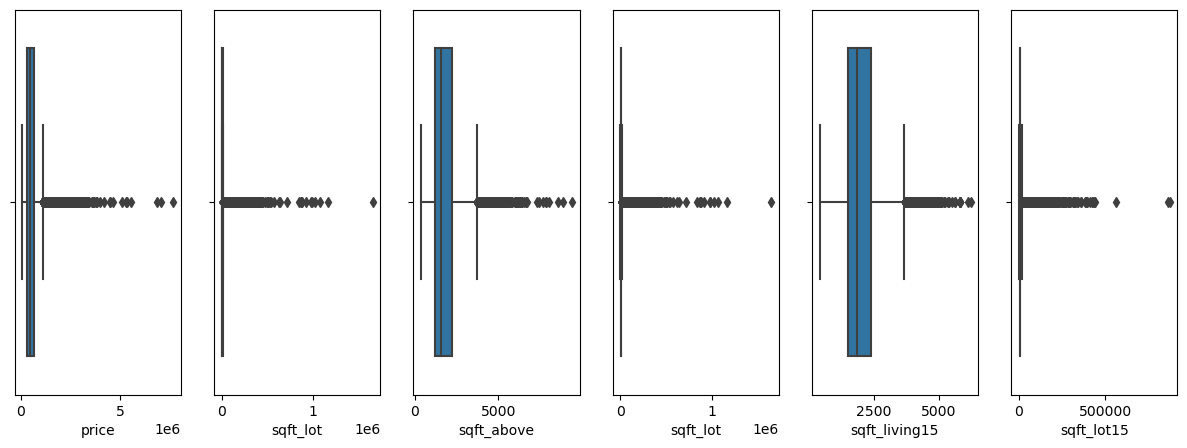

In [22]:
check_outliers(kc_data, ['price', 'sqft_lot', 'sqft_above','sqft_lot','sqft_living15','sqft_lot15'])

/home/pk/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


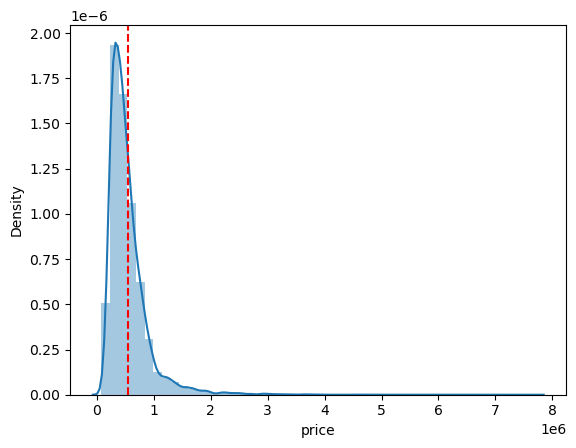

In [28]:
sns.distplot(kc_data['price'])
mean = kc_data['price'].mean()
plt.axvline(x=mean, color='r', linestyle='--')
plt.show()

The data has outliers but we cannot eliminate the outliers because they actually provide valuable information


## Exploratory Data Analysis


### Univariate EDA


Checking for the distribution of individual columns


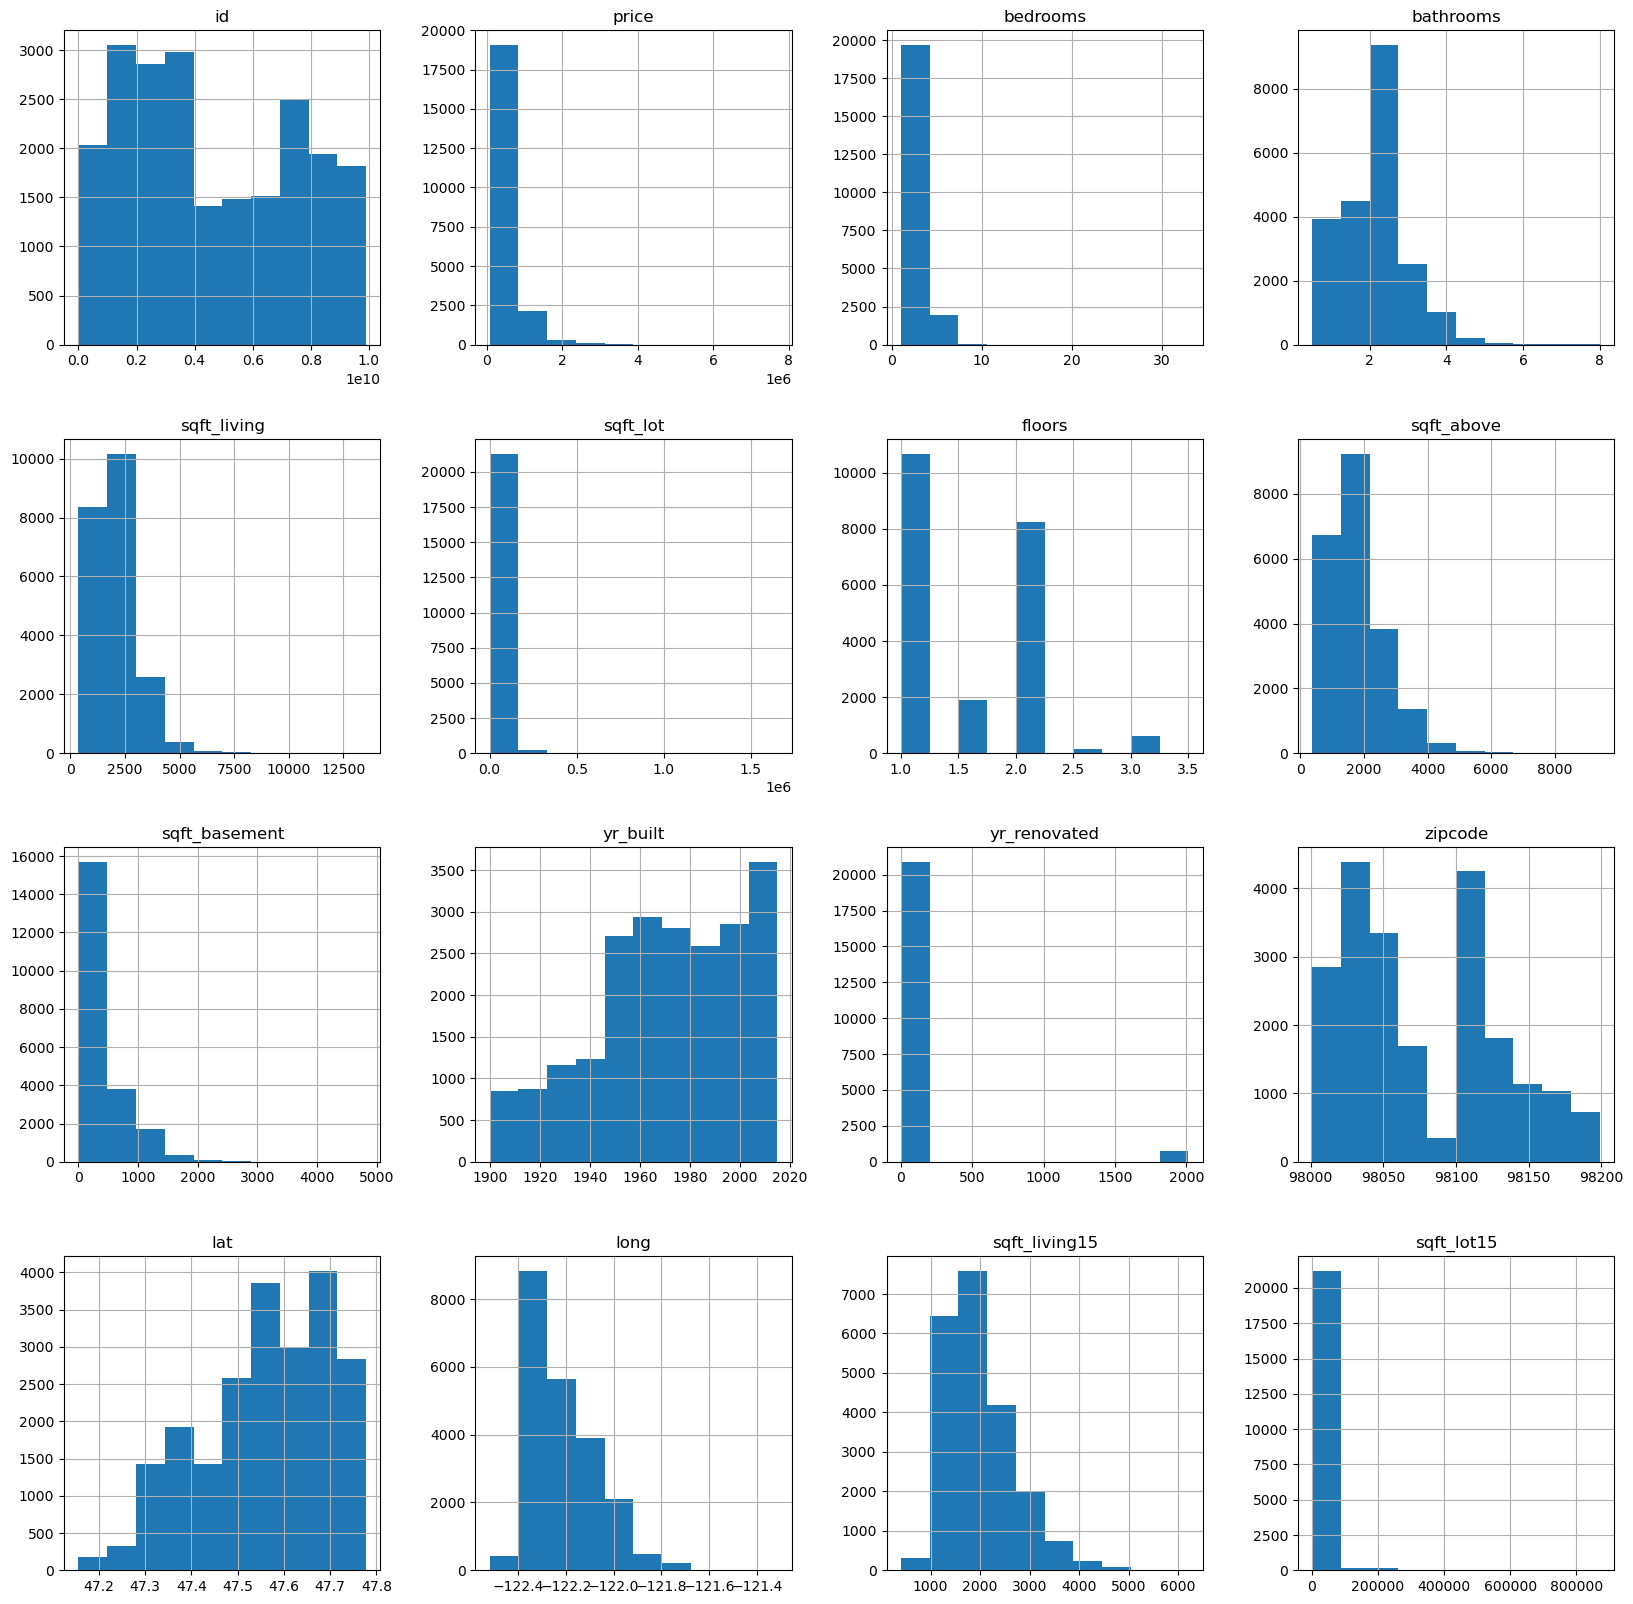

In [29]:
kc_data.hist(figsize=(20,20));

Checking for the location of our house sales


In [32]:
# Group the data by zipcode and calculate the mean latitude and longitude
zipcode_data = kc_data.groupby('zipcode').agg({'lat': 'mean', 'long': 'mean'}).reset_index()

# Create a map centered at the mean latitude and longitude of all the zipcodes
m = folium.Map(location=[kc_data['lat'].mean(), kc_data['long'].mean()], zoom_start=10)

# Add markers for each zipcode
for _, row in zipcode_data.iterrows():
    folium.Marker(location=[row['lat'], row['long']], popup=row['zipcode']).add_to(m)

# Display the map
m

### Bivariate EDA


- Checking for the relationship between variables.
- Our bivariate EDA involves checking for relationship between various features and the price


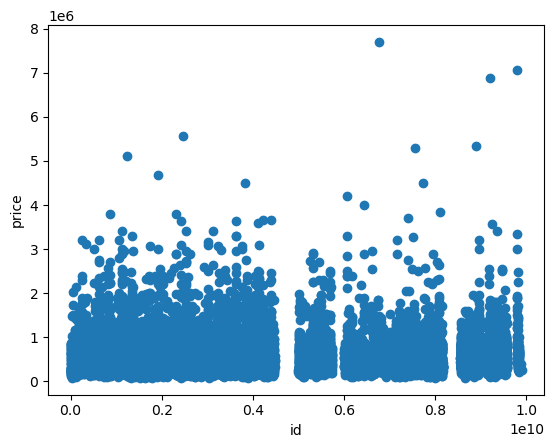

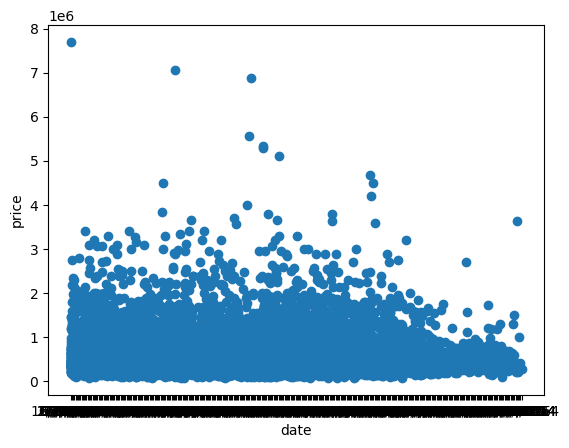

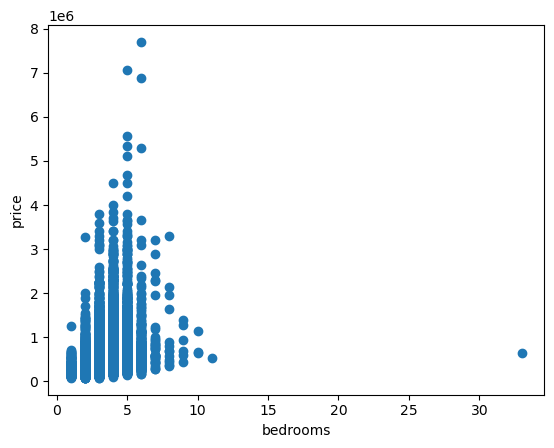

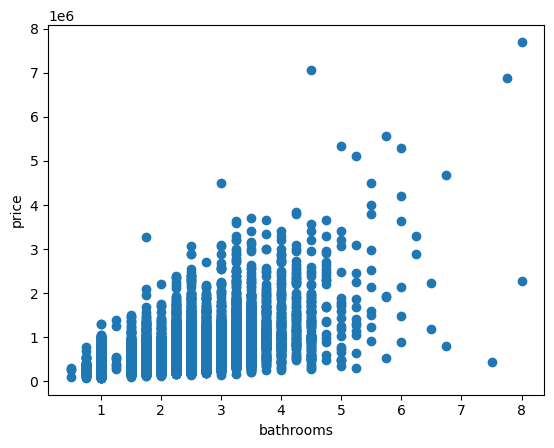

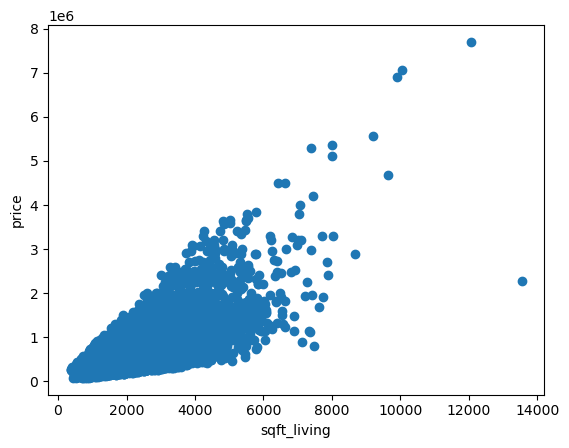

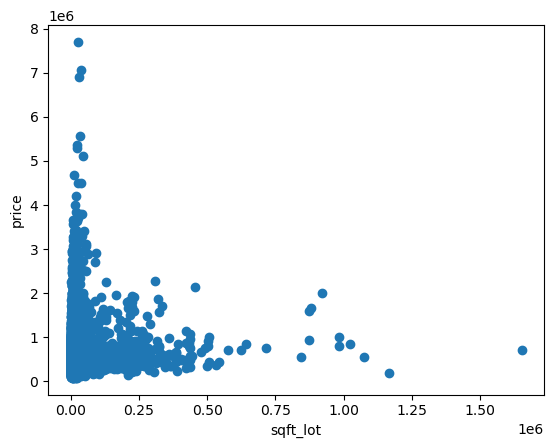

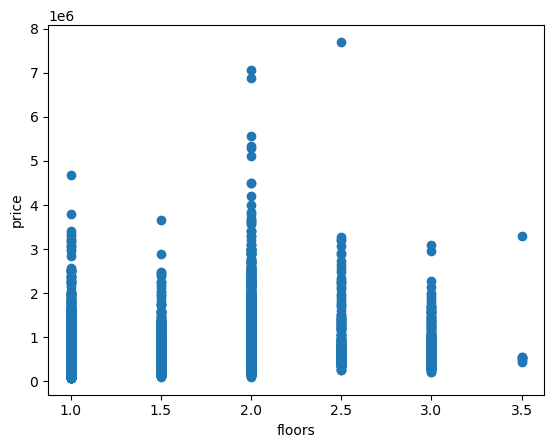

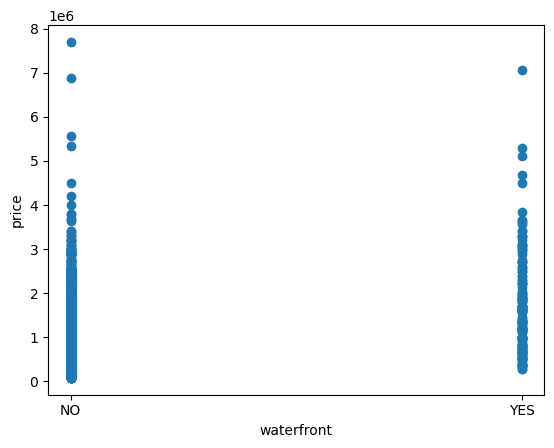

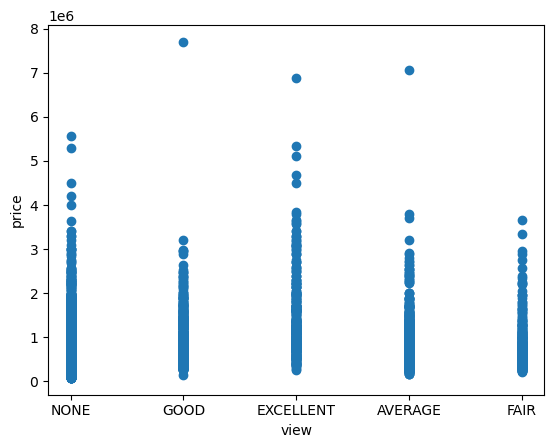

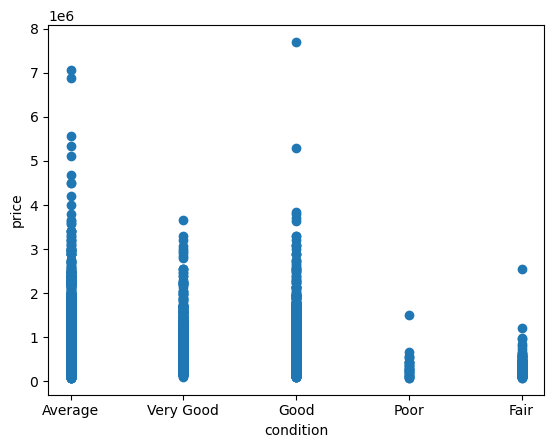

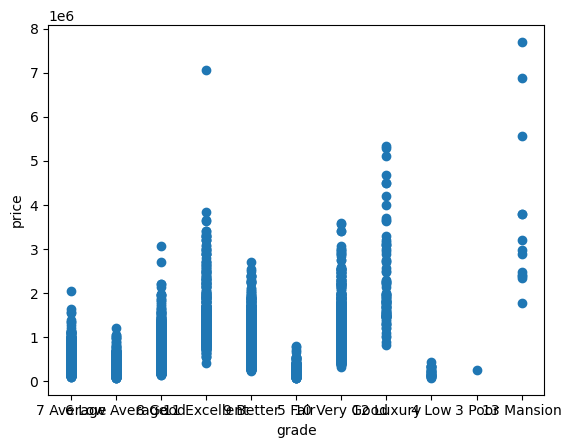

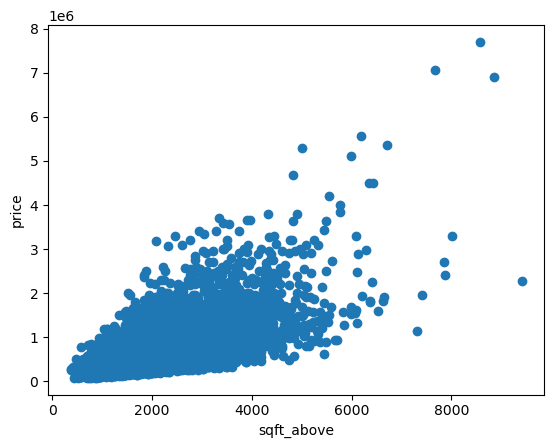

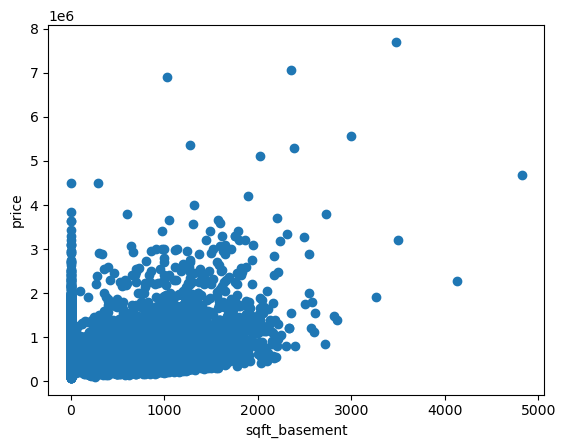

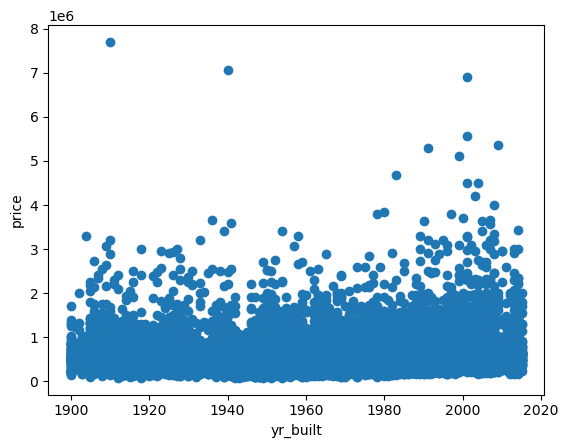

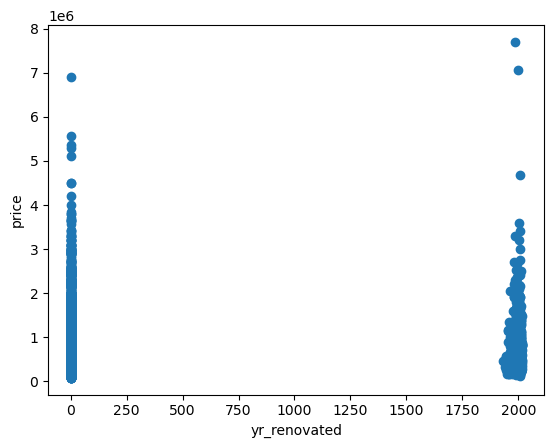

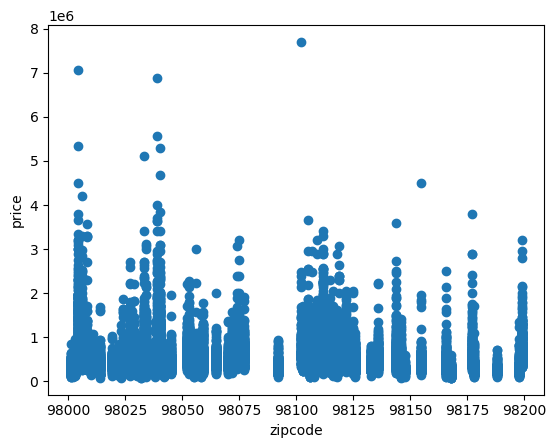

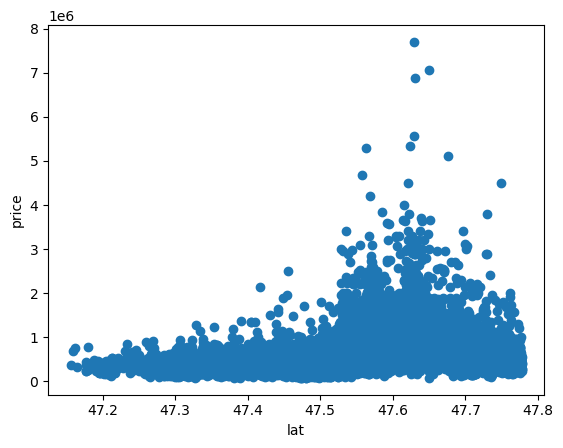

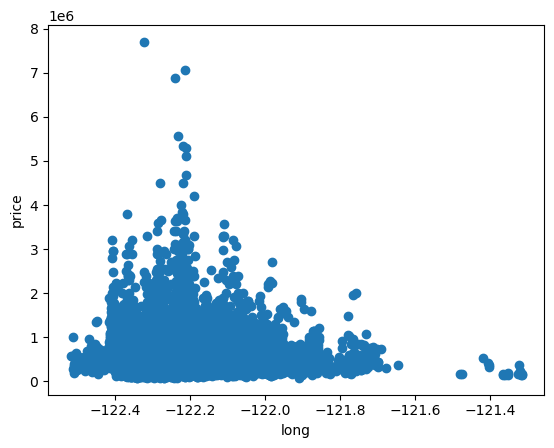

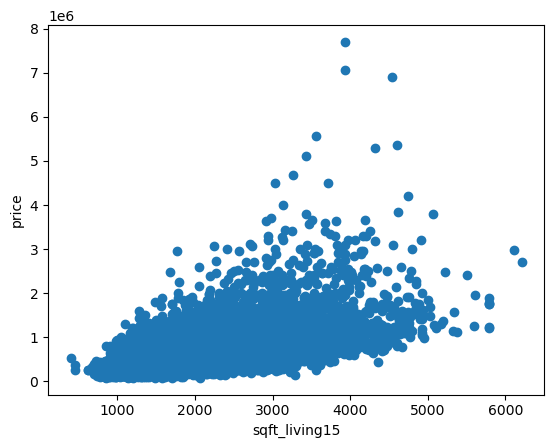

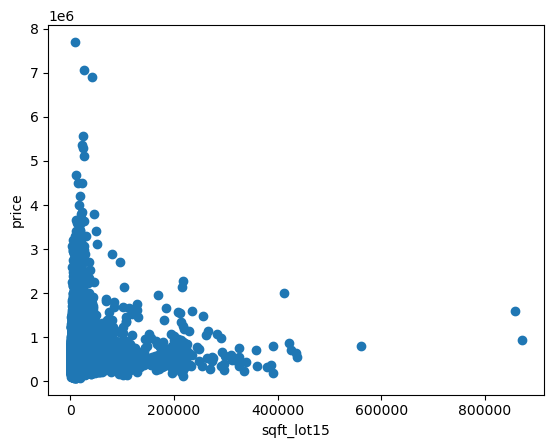

In [33]:
specific_col = 'price'
for col in kc_data.columns:
    if col != specific_col:
        plt.scatter(kc_data[col], kc_data[specific_col])
        plt.xlabel(col)
        plt.ylabel(specific_col)
        plt.show()

In [30]:
kc_quarter =kc_data.copy()

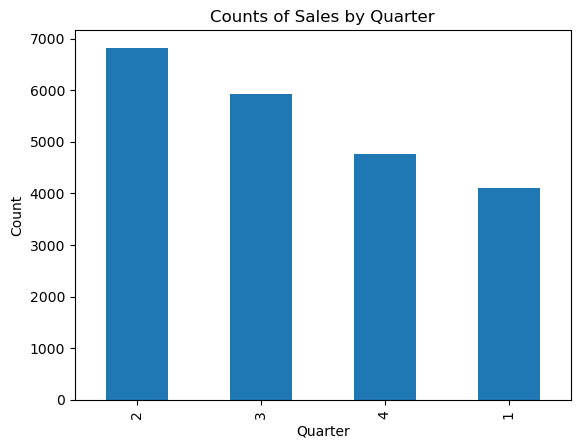

In [31]:
def plot_quarter_counts(data):
    dates = pd.to_datetime(data['date'], format='%m/%d/%Y')
    dates_column = dates.dt.quarter
    # get the counts for each quarter
    quarter_counts = dates_column.value_counts()
    quarter_counts.plot.bar()
    # plot a bar chart of the quarter counts
    plt.title('Counts of Sales by Quarter')
    plt.xlabel('Quarter')
    plt.ylabel('Count')
    plt.show()

plot_quarter_counts(kc_quarter)

We can see that:

- The highest number of house sales are made in the second quarter of the year (Q2: April 1 - June 30) which fall in the Spring season
- The lowest number of house sales are made in the first quarter of the year (Q1: January 1 - March 31) which fall mostly in the Winter season


Converting date column from categorical (object) to numerical (int64)


In [90]:
#converting date column from categorical (object) to numerical (int64)
kc_data['date'] = pd.to_datetime(kc_data['date'], format='%m/%d/%Y')
#Extract the year and create a new column
kc_data['year'] = kc_data['date'].dt.year
kc_data.drop('date', axis=1, inplace=True)

In [91]:
#creating new column age
kc_data['age']= kc_data['year']-kc_data['yr_built']
kc_data['age']

0        59
1        63
2        82
3        49
4        28
         ..
21592     5
21593     1
21594     5
21595    11
21596     6
Name: age, Length: 21596, dtype: int64

In [92]:
duplicates_id = kc_data[kc_data.duplicated(subset=['id'], keep=False)]
print(duplicates_id)

               id      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
93     6021501535   430000.0         3       1.50         1580      5000   
94     6021501535   700000.0         3       1.50         1580      5000   
313    4139480200  1380000.0         4       3.25         4290     12103   
314    4139480200  1400000.0         4       3.25         4290     12103   
324    7520000520   232000.0         2       1.00         1240     12092   
...           ...        ...       ...        ...          ...       ...   
20654  8564860270   502000.0         4       2.50         2680      5539   
20763  6300000226   240000.0         4       1.00         1200      2171   
20764  6300000226   380000.0         4       1.00         1200      2171   
21564  7853420110   594866.0         3       3.00         2780      6000   
21565  7853420110   625000.0         3       3.00         2780      6000   

       floors waterfront  view condition  ... sqft_basement  yr_built  \
93        1.0 

In [93]:
#dropping the columns year, yr_built, id
kc_data.drop(['year','yr_built', 'id'],axis=1, inplace=True )

In [94]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21596 non-null  float64
 1   bedrooms       21596 non-null  int64  
 2   bathrooms      21596 non-null  float64
 3   sqft_living    21596 non-null  int64  
 4   sqft_lot       21596 non-null  int64  
 5   floors         21596 non-null  float64
 6   waterfront     21596 non-null  object 
 7   view           21596 non-null  object 
 8   condition      21596 non-null  object 
 9   grade          21596 non-null  object 
 10  sqft_above     21596 non-null  int64  
 11  sqft_basement  21596 non-null  float64
 12  yr_renovated   21596 non-null  float64
 13  zipcode        21596 non-null  int64  
 14  lat            21596 non-null  float64
 15  long           21596 non-null  float64
 16  sqft_living15  21596 non-null  int64  
 17  sqft_lot15     21596 non-null  int64  
 18  age   

The data doesn't have missing values, duplicates or placeholder values and all the columns are in their correct datatypes


In [95]:
kc_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
count,2.159600e+04,21596.000000,21596.000000,21596.000000,2.159600e+04,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,5.402920e+05,3.371828,2.115843,2080.343165,1.509983e+04,1.494119,1788.631506,285.702954,68.761391,98077.950685,47.560087,-122.213977,1986.650722,12758.656649,43.322189
std,3.673760e+05,0.904114,0.768998,918.122038,4.141355e+04,0.539685,827.763251,439.825454,364.045627,53.514040,0.138552,0.140725,685.231768,27275.018316,29.377523
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,0.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,-1.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,0.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,18.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,1560.000000,0.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,40.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068550e+04,2.000000,2210.000000,550.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,63.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,115.000000


Bivariate EDA


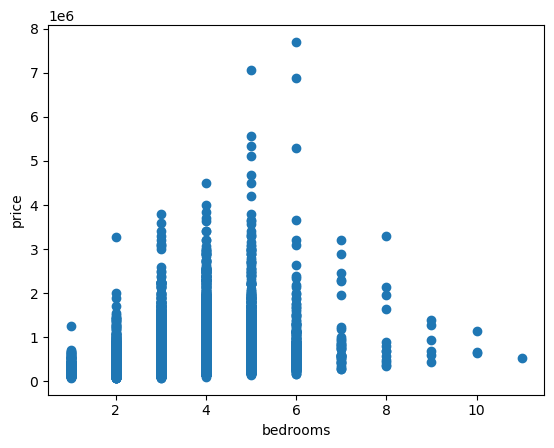

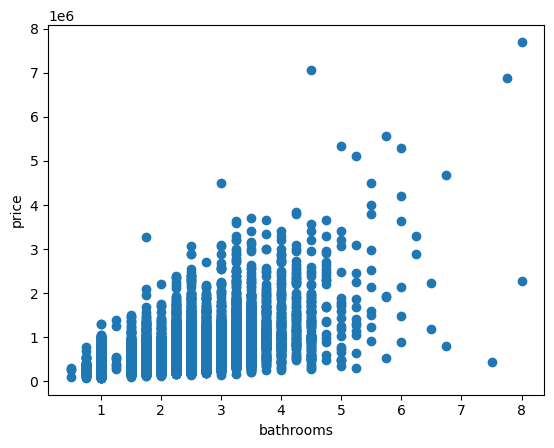

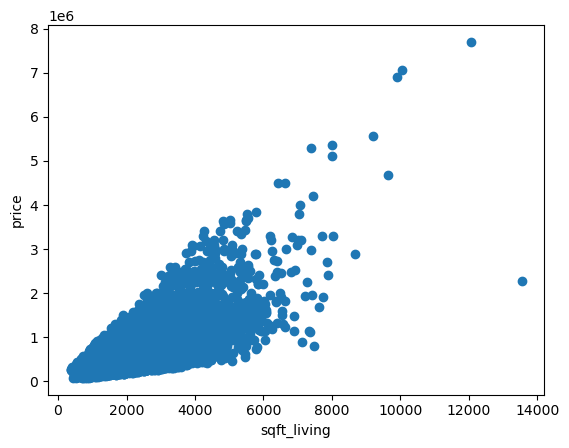

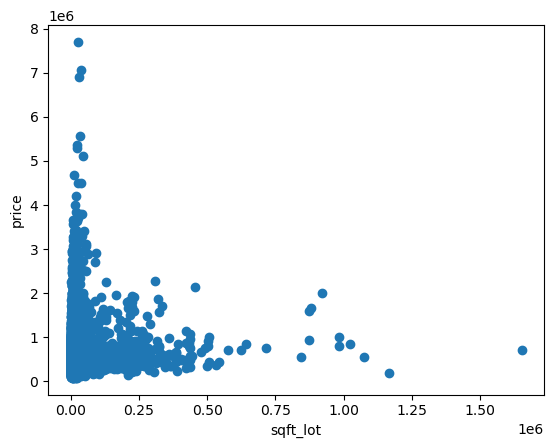

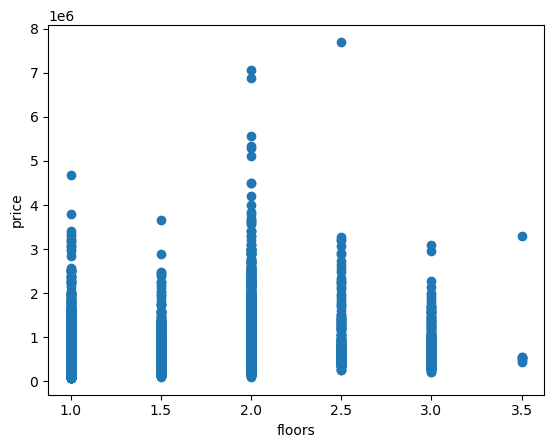

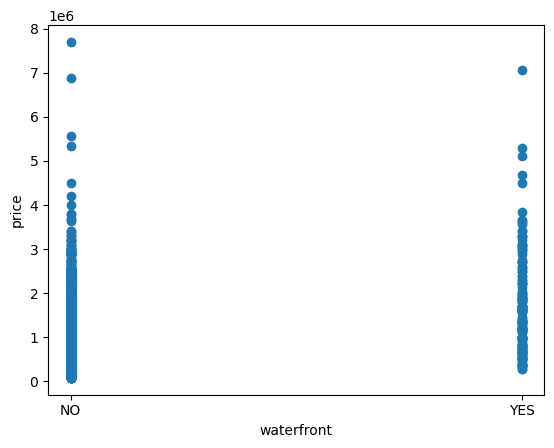

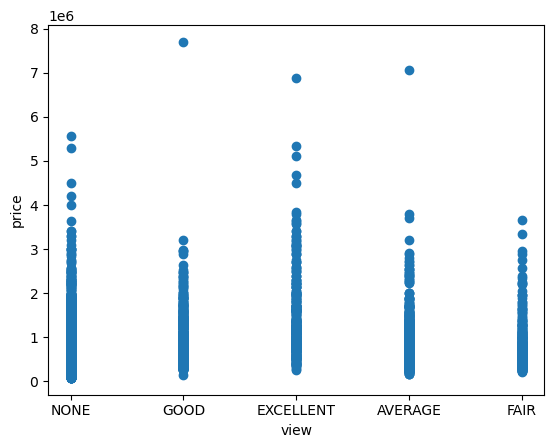

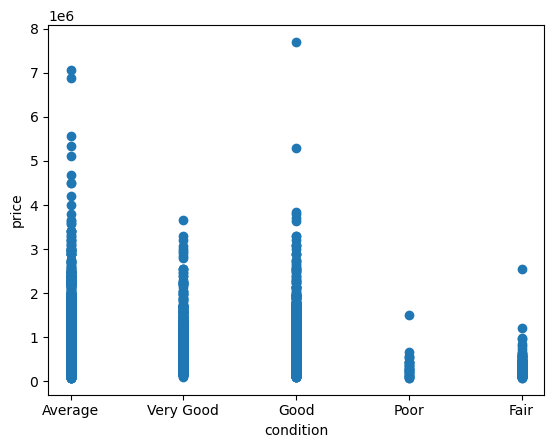

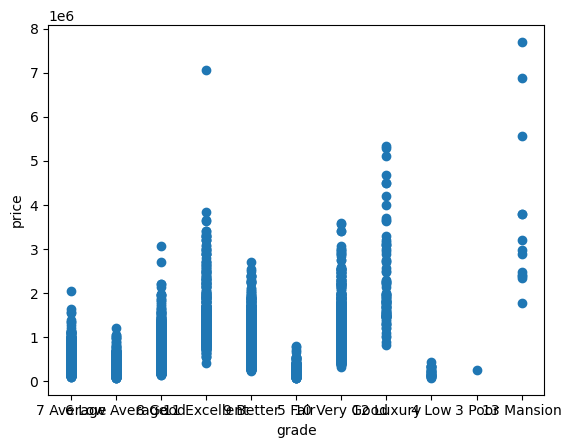

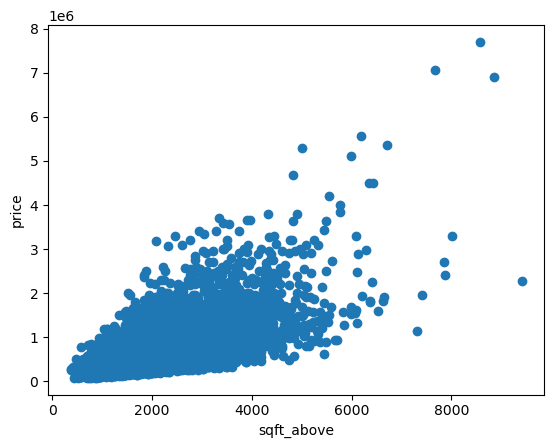

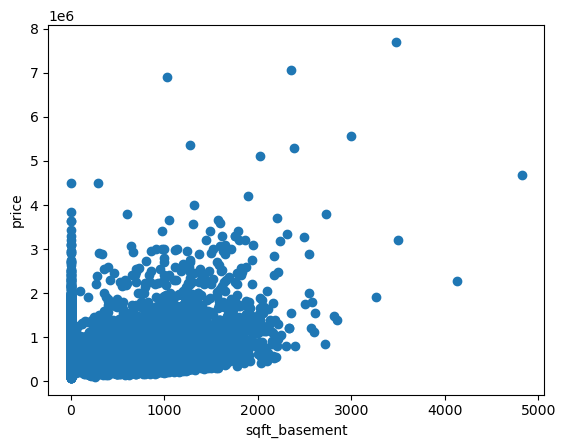

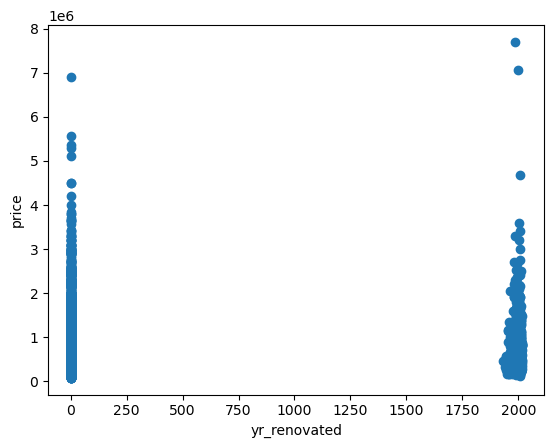

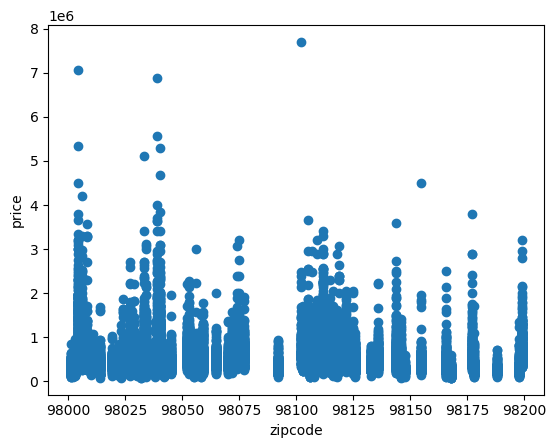

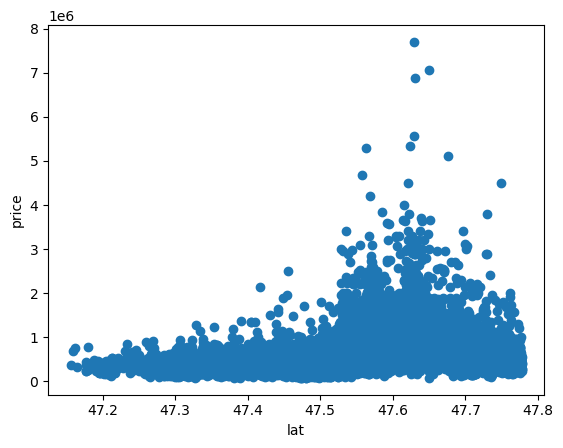

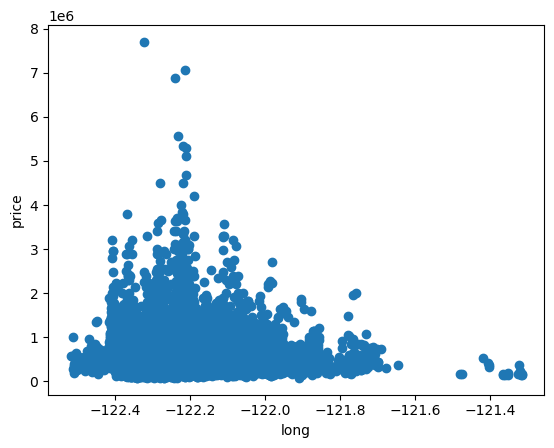

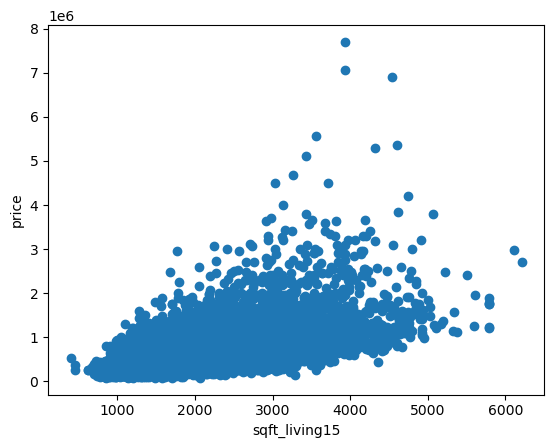

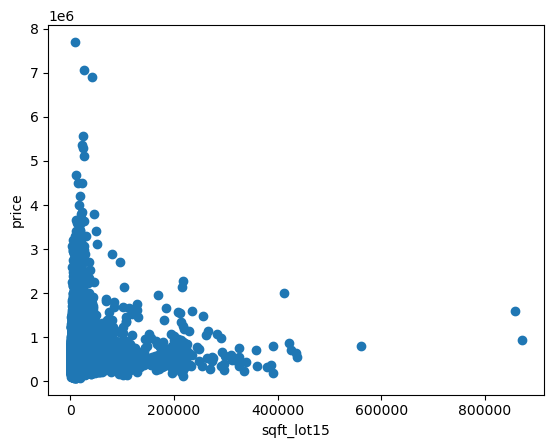

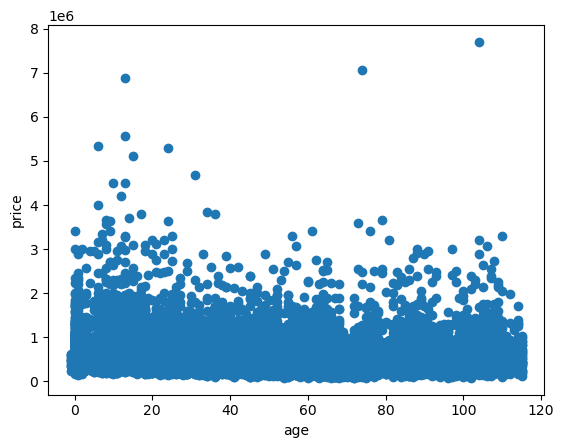

In [99]:
specific_col = 'price'
for col in kc_data.columns:
    if col != specific_col:
        plt.scatter(kc_data[col], kc_data[specific_col])
        plt.xlabel(col)
        plt.ylabel(specific_col)
        plt.show()

From the above visualizations with following features seem to be the ones with the most linear relationship. Therefore we decided to visualize a combination of them with the price


Multivariate Visualizations


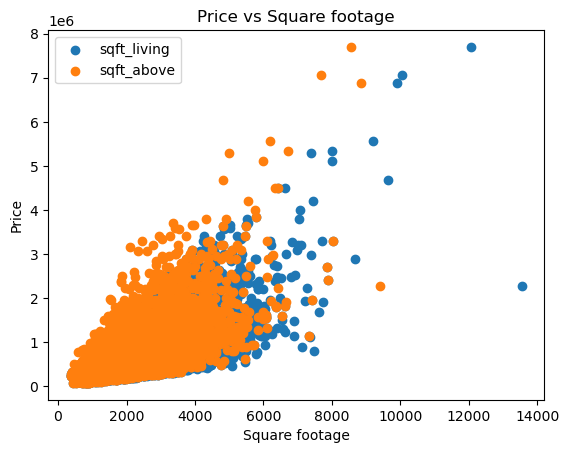

In [ ]:
plt.scatter(kc_data['sqft_living'], kc_data['price'], label='sqft_living')
plt.scatter(kc_data['sqft_above'], kc_data['price'], label='sqft_above')
plt.xlabel('Square footage')
plt.ylabel('Price')
plt.title('Price vs Square footage')
plt.legend()
plt.show()

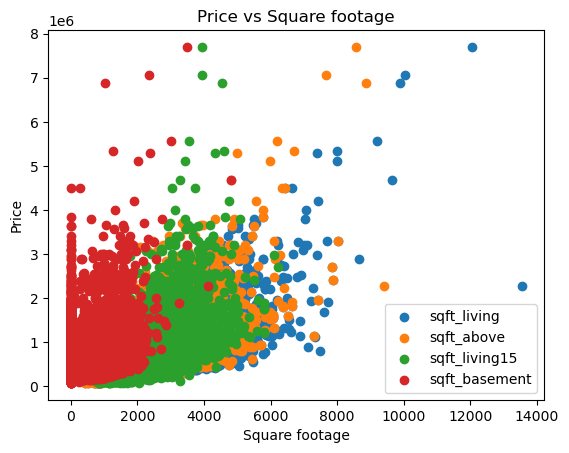

In [ ]:
plt.scatter(kc_data['sqft_living'], kc_data['price'], label='sqft_living')
plt.scatter(kc_data['sqft_above'], kc_data['price'], label='sqft_above')
plt.scatter(kc_data['sqft_living15'], kc_data['price'], label='sqft_living15')
plt.scatter(kc_data['sqft_basement'], kc_data['price'], label='sqft_basement')
plt.xlabel('Square footage')
plt.ylabel('Price')
plt.title('Price vs Square footage')
plt.legend()
plt.show()

In [ ]:
kc_data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,age
id,1.000000,-0.016763,0.002328,0.005145,-0.012258,-0.131920,0.018576,-0.010831,-0.004336,0.021589,-0.010619,-0.008195,-0.001766,0.020643,-0.002734,-0.138570,0.009891,-0.021430
price,-0.016763,1.000000,0.315961,0.525915,0.701929,0.089879,0.256820,0.605392,0.321103,0.053965,0.117858,-0.053409,0.306687,0.022047,0.585267,0.082849,0.003736,-0.053901
bedrooms,0.002328,0.315961,1.000000,0.527870,0.593178,0.033602,0.183707,0.492543,0.303517,0.160736,0.018626,-0.158588,-0.011595,0.136561,0.404532,0.031892,-0.009146,-0.160870
bathrooms,0.005145,0.525915,0.527870,1.000000,0.755755,0.088368,0.502574,0.686664,0.278504,0.507166,0.047173,-0.204778,0.024301,0.224889,0.569878,0.088297,-0.026592,-0.507553
sqft_living,-0.012258,0.701929,0.593178,0.755755,1.000000,0.173449,0.353941,0.876448,0.428683,0.318140,0.051056,-0.199793,0.052178,0.241200,0.756400,0.184337,-0.029031,-0.318580
sqft_lot,-0.131920,0.089879,0.033602,0.088368,0.173449,1.000000,-0.004824,0.184134,0.015038,0.052939,0.004977,-0.129582,-0.085507,0.230222,0.144756,0.718203,0.005621,-0.052846
floors,0.018576,0.256820,0.183707,0.502574,0.353941,-0.004824,1.000000,0.523970,-0.241845,0.489175,0.003785,-0.059522,0.049280,0.125912,0.280072,-0.010734,-0.022382,-0.489497
sqft_above,-0.010831,0.605392,0.492543,0.686664,0.876448,0.184134,0.523970,1.000000,-0.051149,0.424017,0.020637,-0.261557,-0.001160,0.344819,0.731756,0.195069,-0.023811,-0.424367
sqft_basement,-0.004336,0.321103,0.303517,0.278504,0.428683,0.015038,-0.241845,-0.051149,1.000000,-0.130063,0.065014,0.073257,0.109828,-0.142347,0.199324,0.015894,-0.014976,0.129816
yr_built,0.021589,0.053965,0.160736,0.507166,0.318140,0.052939,0.489175,0.424017,-0.130063,1.000000,-0.202565,-0.347199,-0.148340,0.409974,0.326353,0.070767,0.003548,-0.999873


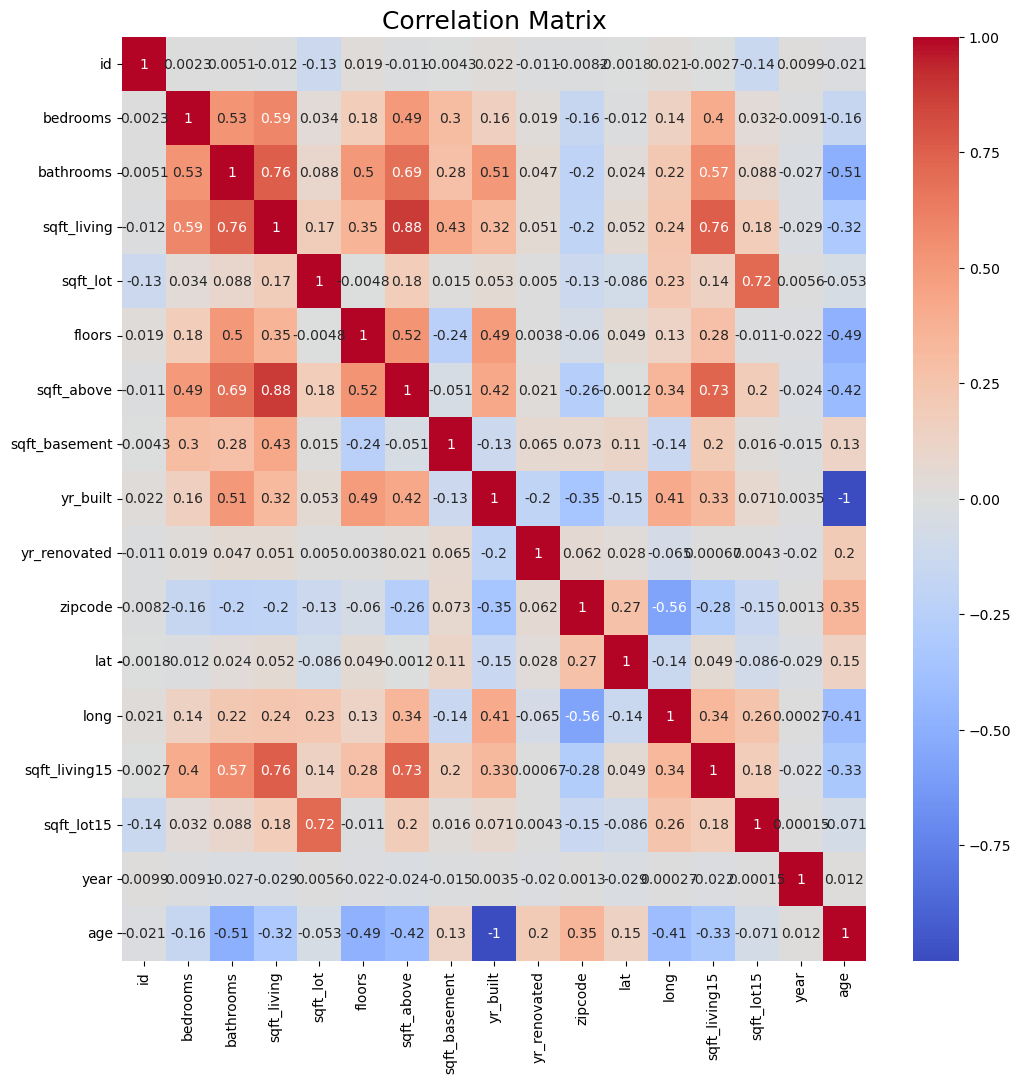

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))   # Set the figure size to 12 inches by 12 inches
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlation Matrix', fontsize=18)
plt.show()

In [ ]:
X = kc_data.drop(['price'], axis=1)
corr_matrix = X.corr()
corr_matrix
#threshold = 0.7
#high_correlation = np.where(np.abs(corr_matrix) > threshold)
#print(high_correlation)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,age
id,1.000000,0.002328,0.005145,-0.012258,-0.131920,0.018576,-0.010831,-0.004336,0.021589,-0.010619,-0.008195,-0.001766,0.020643,-0.002734,-0.138570,0.009891,-0.021430
bedrooms,0.002328,1.000000,0.527870,0.593178,0.033602,0.183707,0.492543,0.303517,0.160736,0.018626,-0.158588,-0.011595,0.136561,0.404532,0.031892,-0.009146,-0.160870
bathrooms,0.005145,0.527870,1.000000,0.755755,0.088368,0.502574,0.686664,0.278504,0.507166,0.047173,-0.204778,0.024301,0.224889,0.569878,0.088297,-0.026592,-0.507553
sqft_living,-0.012258,0.593178,0.755755,1.000000,0.173449,0.353941,0.876448,0.428683,0.318140,0.051056,-0.199793,0.052178,0.241200,0.756400,0.184337,-0.029031,-0.318580
sqft_lot,-0.131920,0.033602,0.088368,0.173449,1.000000,-0.004824,0.184134,0.015038,0.052939,0.004977,-0.129582,-0.085507,0.230222,0.144756,0.718203,0.005621,-0.052846
floors,0.018576,0.183707,0.502574,0.353941,-0.004824,1.000000,0.523970,-0.241845,0.489175,0.003785,-0.059522,0.049280,0.125912,0.280072,-0.010734,-0.022382,-0.489497
sqft_above,-0.010831,0.492543,0.686664,0.876448,0.184134,0.523970,1.000000,-0.051149,0.424017,0.020637,-0.261557,-0.001160,0.344819,0.731756,0.195069,-0.023811,-0.424367
sqft_basement,-0.004336,0.303517,0.278504,0.428683,0.015038,-0.241845,-0.051149,1.000000,-0.130063,0.065014,0.073257,0.109828,-0.142347,0.199324,0.015894,-0.014976,0.129816
yr_built,0.021589,0.160736,0.507166,0.318140,0.052939,0.489175,0.424017,-0.130063,1.000000,-0.202565,-0.347199,-0.148340,0.409974,0.326353,0.070767,0.003548,-0.999873
yr_renovated,-0.010619,0.018626,0.047173,0.051056,0.004977,0.003785,0.020637,0.065014,-0.202565,1.000000,0.062402,0.027979,-0.064551,0.000675,0.004283,-0.019719,0.202237


In [ ]:
df=kc_data.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous i
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(age, yr_built)",0.999873
"(yr_built, age)",0.999873
"(sqft_above, sqft_living)",0.876448
"(sqft_living, sqft_above)",0.876448
"(sqft_living15, sqft_living)",0.756400
"(sqft_living, sqft_living15)",0.756400
"(bathrooms, sqft_living)",0.755755
"(sqft_living, bathrooms)",0.755755


Dropping some columns due to multicollinearity


In [ ]:
kc_data.drop(['sqft_above', 'sqft_living15', 'bathrooms'], axis=1, inplace=True)
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21596 non-null  int64  
 1   price          21596 non-null  float64
 2   bedrooms       21596 non-null  int64  
 3   sqft_living    21596 non-null  int64  
 4   sqft_lot       21596 non-null  int64  
 5   floors         21596 non-null  float64
 6   waterfront     21596 non-null  object 
 7   view           21596 non-null  object 
 8   condition      21596 non-null  object 
 9   grade          21596 non-null  object 
 10  sqft_basement  21596 non-null  float64
 11  yr_built       21596 non-null  int64  
 12  yr_renovated   21596 non-null  float64
 13  zipcode        21596 non-null  int64  
 14  lat            21596 non-null  float64
 15  long           21596 non-null  float64
 16  sqft_lot15     21596 non-null  int64  
 17  year           21596 non-null  int64  
 18  age   

Dropping some columns because they contain categorical values


In [ ]:
kc_data.drop(['lat', 'long', 'zipcode'], axis=1, inplace=True)
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21596 non-null  int64  
 1   price          21596 non-null  float64
 2   bedrooms       21596 non-null  int64  
 3   sqft_living    21596 non-null  int64  
 4   sqft_lot       21596 non-null  int64  
 5   floors         21596 non-null  float64
 6   waterfront     21596 non-null  object 
 7   view           21596 non-null  object 
 8   condition      21596 non-null  object 
 9   grade          21596 non-null  object 
 10  sqft_basement  21596 non-null  float64
 11  yr_built       21596 non-null  int64  
 12  yr_renovated   21596 non-null  float64
 13  sqft_lot15     21596 non-null  int64  
 14  year           21596 non-null  int64  
 15  age            21596 non-null  int64  
dtypes: float64(4), int64(8), object(4)
memory usage: 2.8+ MB


In [ ]:
kc_data['yr_renovated']= kc_data['yr_renovated'].apply(lambda x: 1 if x>0 else 0 )
kc_data['yr_renovated'].value_counts()

0    20852
1      744
Name: yr_renovated, dtype: int64

In [ ]:
kc_data['waterfront'] = kc_data['waterfront'].apply(lambda x: 0 if x =='NO' else 1 )
kc_data['waterfront'].value_counts()

0    21450
1      146
Name: waterfront, dtype: int64

In [ ]:
label_encoder = LabelEncoder()
kc_data['view'] = label_encoder.fit_transform(kc_data['view'])
kc_data['view'].value_counts()

4    19484
0      957
3      508
2      330
1      317
Name: view, dtype: int64

In [ ]:
kc_data['grade']

0            7 Average
1            7 Average
2        6 Low Average
3            7 Average
4               8 Good
             ...      
21592           8 Good
21593           8 Good
21594        7 Average
21595           8 Good
21596        7 Average
Name: grade, Length: 21596, dtype: object

In [ ]:
label_encoder = LabelEncoder()
kc_data['grade'] = label_encoder.fit_transform(kc_data['grade'])
kc_data['grade'].value_counts()

8     8973
9     6065
10    2615
7     2038
0     1134
1      399
6      242
2       89
5       27
3       13
4        1
Name: grade, dtype: int64

In [ ]:
label_encoder = LabelEncoder()
kc_data['condition'] = label_encoder.fit_transform(kc_data['condition'])
kc_data['condition'].value_counts()

0    14020
2     5677
4     1700
1      170
3       29
Name: condition, dtype: int64

In [ ]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21596 non-null  int64  
 1   price          21596 non-null  float64
 2   bedrooms       21596 non-null  int64  
 3   sqft_living    21596 non-null  int64  
 4   sqft_lot       21596 non-null  int64  
 5   floors         21596 non-null  float64
 6   waterfront     21596 non-null  int64  
 7   view           21596 non-null  int64  
 8   condition      21596 non-null  int64  
 9   grade          21596 non-null  int64  
 10  sqft_basement  21596 non-null  float64
 11  yr_built       21596 non-null  int64  
 12  yr_renovated   21596 non-null  int64  
 13  sqft_lot15     21596 non-null  int64  
 14  year           21596 non-null  int64  
 15  age            21596 non-null  int64  
dtypes: float64(3), int64(13)
memory usage: 2.8 MB


Linear Regression


In [ ]:
# Define the predictors and outcome
predictors = ['sqft_living', 'sqft_lot', 'bedrooms', 'grade']
outcome = 'price'

# Impute missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
kc_data[predictors] = imputer.fit_transform(kc_data[predictors])
# Fit the linear regression model
house_lm = LinearRegression()
house_lm.fit(kc_data[predictors], kc_data[outcome])

# Print the model coefficients
print(f'Intercept: {house_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(predictors, house_lm.coef_):
    print(f' {name}: {coef}')

Intercept: 288538.059
Coefficients:
 sqft_living: 297.3667544734492
 sqft_lot: -0.42158593650172943
 bedrooms: -53777.83294053593
 grade: -22897.381901314813


In [ ]:
#fitted = house_lm.predict(kc_data[predictors])
#RMSE = np.sqrt(mean_squared_error(kc_data[outcome], fitted))
#r2 = r2_score(kc_data[outcome], fitted)
#print(f'RMSE: {RMSE:.0f}')
#print(f'r2: {r2:.4f}')

In [ ]:
#y = kc_data['price']
#X = kc_data.drop('price', axis=1, inplace=True)
#lm1 = sm.OLS(y, X).fit()
#lm1 = lm1.summary()
#lm1

#predictors = ['sqft_living', 'sqft_lot', 'bedrooms', 'grade']
#outcome = 'price'
#model = sm.OLS(kc_data[outcome], kc_data[predictors].assign(const=1))
#results = model.fit()
#print(results.summary())

In [ ]:
kc_data.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701929
sqft_basement    0.321103
bedrooms         0.315961
waterfront       0.264308
floors           0.256820
yr_renovated     0.117546
sqft_lot         0.089879
sqft_lot15       0.082849
yr_built         0.053965
condition        0.022218
year             0.003736
id              -0.016763
age             -0.053901
view            -0.304731
grade           -0.366460
Name: price, dtype: float64

In [ ]:
X= kc_data[['sqft_living', 'sqft_basement', 'bedrooms', 'waterfront']]
y=kc_data['price']
model=sm.OLS(y, sm.add_constant(X))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     6389.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:21:02   Log-Likelihood:            -2.9894e+05
No. Observations:               21596   AIC:                         5.979e+05
Df Residuals:                   21591   BIC:                         5.979e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          9.081e+04   6604.180     13.750      0.000    7.79e+04    1.04e+05
sqft_living     301.9101      2.434    124.027      0.000     297.139     306.681
sqft_basement    20.5012      4.273      4.798      0.000      12.127      28.876
bedrooms      -5.635e+04   2337.916    -24.102      0.000   -6.09e+04   -5.18e+04
waterfront     8.206e+05   2.09e+04     39.353      0.000     7.8e+05    8.61e+05
==============================================================================
Omnibus:                    12969.042   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           388667.432
Skew:                           2.374   Prob(JB):                         0.00
Kurtosis:                      23.233   Cond. No.                     2.83e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
fitted = house_lm.predict(kc_data[predictors])
RMSE = np.sqrt(mean_squared_error(kc_data[outcome], fitted))
r2 = r2_score(kc_data[outcome], fitted)
print(f'RMSE: {RMSE:.0f}')
print(f'r2: {r2:.4f}')

RMSE: 252332
r2: 0.5282


In [ ]:
X= kc_data[['sqft_living', 'sqft_basement', 'bedrooms', 'waterfront']]
y=kc_data['price']
model=sm.OLS(y, sm.add_constant(X))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     6389.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:21:03   Log-Likelihood:            -2.9894e+05
No. Observations:               21596   AIC:                         5.979e+05
Df Residuals:                   21591   BIC:                         5.979e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          9.081e+04   6604.180     13.750      0.000    7.79e+04    1.04e+05
sqft_living     301.9101      2.434    124.027      0.000     297.139     306.681
sqft_basement    20.5012      4.273      4.798      0.000      12.127      28.876
bedrooms      -5.635e+04   2337.916    -24.102      0.000   -6.09e+04   -5.18e+04
waterfront     8.206e+05   2.09e+04     39.353      0.000     7.8e+05    8.61e+05
==============================================================================
Omnibus:                    12969.042   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           388667.432
Skew:                           2.374   Prob(JB):                         0.00
Kurtosis:                      23.233   Cond. No.                     2.83e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:

kc_data_copy = kc_data.copy() # make a copy of kc_data
X = kc_data_copy.drop('price', axis=1)
y = kc_data_copy['price']
X = sm.add_constant(X)
model1 = sm.OLS(y, X)
results1 = model1.fit() 
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     2353.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:21:04   Log-Likelihood:            -2.9737e+05
No. Observations:               21596   AIC:                         5.948e+05
Df Residuals:                   21581   BIC:                         5.949e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.337e+07   6.79e+06     -6.382

In [ ]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)
  

NameError: name 'variance_inflation_factor' is not defined